In [ ]:
# 1. Import callbacks
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.datasets import mnist

# 2. Input Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 3. Define Model
model = Sequential([Flatten(),
                    Dense(10, activation='softmax')])

# 4. Initialize Checkpoint
mc = ModelCheckpoint(filepath='best_model.hdf5', verbose=1)

# 5. Train model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[mc])

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 3s 51us/step - loss: 9.3363 - val_loss: 7.6399

Epoch 00001: saving model to best_model.hdf5


### Model Checkpointer

In [ ]:
# 1. Import callbacks
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.datasets import mnist

# 2. Input Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255, X_test/255

# 3. Define Model
model = Sequential([Flatten(),
                    Dense(2048, activation='relu'),
                    Dense(10, activation='softmax')])

# 4. Initialize Checkpoint
mc = ModelCheckpoint(filepath='best_model.hdf5', save_best_only=True, \
                     verbose=1, monitor='val_acc')

# 5. Train model
model.compile(loss='sparse_categorical_crossentropy', \
              metrics=['accuracy'], optimizer='adam')

model.fit(X_train, y_train, validation_data=(X_test, y_test), \
          epochs=10, callbacks=[mc])

# 6. Loading Best Model
model.load_weights('best_model.hdf5')

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.1749 - acc: 0.9470 - val_loss: 0.1009 - val_acc: 0.9691

Epoch 00001: val_acc improved from -inf to 0.96910, saving model to best_model.hdf5
Epoch 2/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.0744 - acc: 0.9763 - val_loss: 0.1056 - val_acc: 0.9672

Epoch 00002: val_acc did not improve from 0.96910
Epoch 3/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0469 - acc: 0.9849 - val_loss: 0.0667 - val_acc: 0.9801

Epoch 00003: val_acc improved from 0.96910 to 0.98010, saving model to best_model.hdf5
Epoch 4/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.0344 - acc: 0.9881 - val_loss: 0.0747 - val_acc: 0.9796

Epoch 00004: val_acc did not improve from 0.98010
Epoch 5/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0274 - acc: 0.9908 - val_loss: 0.0667 - v

### Train/Validation/Test Split

In [ ]:
# 1. Import callbacks
from keras.models import Sequential
from keras.layers import Flatten, Dense

# 2. Input Data
(X, y), (X_test, y_test) = mnist.load_data()

# 3. Split Train and Validation set
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = \
train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Define Model
model = Sequential([Flatten(),
                    Dense(10, activation='softmax')])

# 5. Train model
model.compile(loss='sparse_categorical_crossentropy', \
              metrics=['accuracy'], optimizer='adam')
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=3)

# 6. Evaluate model on Test Set
out = model.evaluate(X_test, y_test)
print(f'Test Loss: {out[0]} | Test Acc: {out[1]}')

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 3s 56us/step - loss: 8.4341 - acc: 0.4729 - val_loss: 7.7753 - val_acc: 0.5142
Epoch 2/3
48000/48000 [==============================] - 2s 47us/step - loss: 7.2079 - acc: 0.5501 - val_loss: 7.0571 - val_acc: 0.5606
Epoch 3/3
10000/10000 [==============================] - 0s 22us/step
Test Loss: 7.134778759002685 | Test Acc: 0.5557


### Validation Set used as Test Set (not recommended for real projects)

In [ ]:
# 1. Import callbacks
from keras.models import Sequential
from keras.layers import Flatten, Dense

# 2. Input Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# 3. Define Model
model = Sequential([Flatten(),
                    Dense(10, activation='softmax')])

# 4. Train model
model.compile(loss='sparse_categorical_crossentropy', \
              metrics=['accuracy'], optimizer='adam')
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

### Dropout
#### Before Dropout

In [ ]:
# 1. Import callbacks
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.datasets import fashion_mnist

# 2. Input Data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train[..., None], X_test[..., None] # reshape data

mean, std = X_train.mean(), X_train.std()
X_train, X_test = (X_train-mean)/std, (X_test-mean)/std

# 3. Define Model
model = Sequential([Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
                    MaxPooling2D(pool_size=(2, 2), strides=2),
                    Conv2D(64, kernel_size=(3, 3), activation='relu'),
                    MaxPooling2D(pool_size=(2, 2), strides=2),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(10, activation='softmax')])


# 5. Train model
model.compile(loss='sparse_categorical_crossentropy', \
              metrics=['accuracy'], optimizer='adam')

model.fit(X_train, y_train, validation_data=(X_test, y_test), \
          epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 305us/step - loss: 0.3914 - acc: 0.8554 - val_loss: 0.3032 - val_acc: 0.8872
Epoch 2/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.2639 - acc: 0.9019 - val_loss: 0.2921 - val_acc: 0.8889
Epoch 3/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.2203 - acc: 0.9172 - val_loss: 0.2587 - val_acc: 0.9064
Epoch 4/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.1813 - acc: 0.9327 - val_loss: 0.2691 - val_acc: 0.9074
Epoch 5/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.1548 - acc: 0.9420 - val_loss: 0.2831 - val_acc: 0.9028
Epoch 6/10
60000/60000 [==============================] - 17s 279us/step - loss: 0.1255 - acc: 0.9529 - val_loss: 0.2670 - val_acc: 0.9141
Epoch 7/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.1028 - acc: 0.9609 - val_loss: 0.

#### After Dropout

In [ ]:
# 1. Import callbacks
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.callbacks import ModelCheckpoint
from keras.datasets import fashion_mnist

# 2. Input Data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train[..., None], X_test[..., None] # reshape data

mean, std = X_train.mean(), X_train.std()
X_train, X_test = (X_train-mean)/std, (X_test-mean)/std # normalize data

# 3. Define Model
model = Sequential([Conv2D(32, kernel_size=(3, 3), activation='relu', \
                           input_shape=(28,28,1)),
                    MaxPooling2D(pool_size=(2, 2), strides=2),
                    Conv2D(64, kernel_size=(3, 3), activation='relu'),
                    MaxPooling2D(pool_size=(2, 2), strides=2),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dropout(0.5),
                    Dense(10, activation='softmax')])


# 5. Train model
model.compile(loss='sparse_categorical_crossentropy', \
              metrics=['accuracy'], optimizer='adam')

model.fit(X_train, y_train, validation_data=(X_test, y_test), \
          epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 307us/step - loss: 0.4392 - acc: 0.8410 - val_loss: 0.3194 - val_acc: 0.8840
Epoch 2/10
60000/60000 [==============================] - 17s 283us/step - loss: 0.3021 - acc: 0.8904 - val_loss: 0.2776 - val_acc: 0.8983
Epoch 3/10
60000/60000 [==============================] - 17s 287us/step - loss: 0.2581 - acc: 0.9052 - val_loss: 0.2671 - val_acc: 0.9031
Epoch 4/10
60000/60000 [==============================] - 17s 283us/step - loss: 0.2326 - acc: 0.9147 - val_loss: 0.2542 - val_acc: 0.9094
Epoch 5/10
60000/60000 [==============================] - 17s 281us/step - loss: 0.2077 - acc: 0.9217 - val_loss: 0.2583 - val_acc: 0.9100
Epoch 6/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.1888 - acc: 0.9298 - val_loss: 0.2440 - val_acc: 0.9110
Epoch 7/10
60000/60000 [==============================] - 17s 282us/step - loss: 0.1690 - acc: 0.9369 - val_loss: 0.

### Data Augmentation

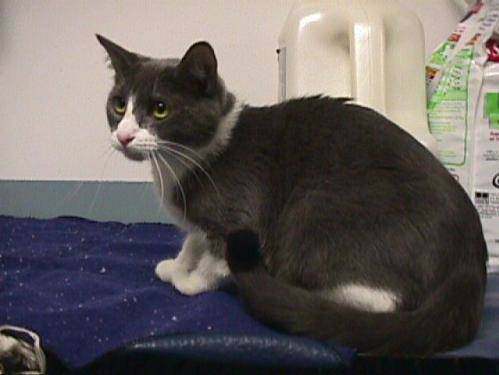

In [ ]:
import requests
from PIL import Image
from io import BytesIO

def img_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

URL = 'https://github.com/WittmannF/AutoDL/raw/master/data-cats-dogs/train/cats/cat.4.jpg'
img = img_from_url(URL); img

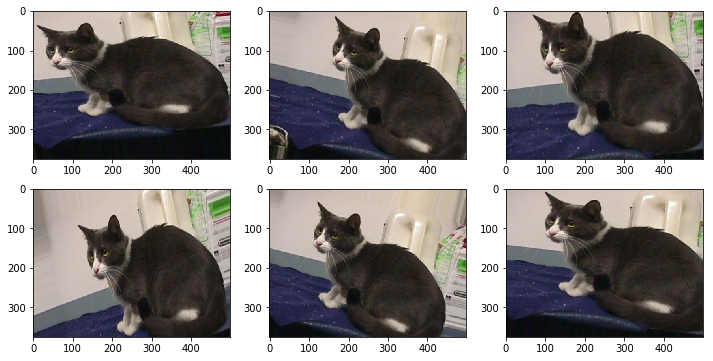

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

def show_batch(datagen):

    plt.figure(figsize=(12, 6))

    for i in range(6):
        plt.subplot(2, 3, i+1)
        img = next(iter(datagen))
        plt.imshow(img[0])

    plt.show()

datagen = ImageDataGenerator(rotation_range=15,
                            rescale=1./255,
                            shear_range=0.1,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            width_shift_range=0.1,
                            height_shift_range=0.1)

datagen = datagen.flow(np.array(img)[None])

show_batch(datagen)

### Batch Normalization

In [ ]:
# 1. Import callbacks
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.datasets import fashion_mnist

# 2. Input Data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train[..., None], X_test[..., None] # reshape data

mean, std = X_train.mean(), X_train.std()
X_train, X_test = (X_train-mean)/std, (X_test-mean)/std # normalize data

# 3. Define Model
model = Sequential([Conv2D(16, kernel_size=(3, 3), activation='relu', \
                           input_shape=(28,28,1)),
                    MaxPooling2D(pool_size=(2, 2)),
                    BatchNormalization(),
                    Conv2D(64, kernel_size=(3, 3), activation='relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    BatchNormalization(),
                    Conv2D(128, kernel_size=(3, 3), activation='relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    BatchNormalization(),
                    Flatten(),
                    Dense(512, activation='relu'),
                    BatchNormalization(),
                    Dense(256, activation='relu'),
                    BatchNormalization(),
                    Dense(128, activation='relu'),
                    BatchNormalization(),
                    Dense(10, activation='softmax')])


# 5. Train model
model.compile(loss='sparse_categorical_crossentropy', \
              metrics=['accuracy'], optimizer='adam')

model.fit(X_train, y_train, validation_data=(X_test, y_test), \
          epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 401us/step - loss: 0.5047 - acc: 0.8199 - val_loss: 0.3821 - val_acc: 0.8645
Epoch 2/10
60000/60000 [==============================] - 21s 355us/step - loss: 0.3625 - acc: 0.8684 - val_loss: 0.3688 - val_acc: 0.8667
Epoch 3/10
60000/60000 [==============================] - 21s 344us/step - loss: 0.3234 - acc: 0.8823 - val_loss: 0.3428 - val_acc: 0.8723
Epoch 4/10
60000/60000 [==============================] - 21s 344us/step - loss: 0.2909 - acc: 0.8939 - val_loss: 0.3658 - val_acc: 0.8621
Epoch 5/10
60000/60000 [==============================] - 21s 345us/step - loss: 0.2623 - acc: 0.9026 - val_loss: 0.3095 - val_acc: 0.8861
Epoch 6/10
60000/60000 [==============================] - 21s 342us/step - loss: 0.2404 - acc: 0.9106 - val_loss: 0.3234 - val_acc: 0.8836
Epoch 7/10
60000/60000 [==============================] - 21s 346us/step - loss: 0.2239 - acc: 0.9172 - val_loss: 0.

In [ ]:
# 1. Import callbacks
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.datasets import fashion_mnist

# 2. Input Data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train[..., None], X_test[..., None] # reshape data

mean, std = X_train.mean(), X_train.std()
X_train, X_test = (X_train-mean)/std, (X_test-mean)/std # normalize data

# 3. Define Model
model = Sequential([Conv2D(32, kernel_size=(3, 3), activation='relu', \
                           input_shape=(28,28,1)),
                    MaxPooling2D(pool_size=(2, 2), strides=2),
                    BatchNormalization(),
                    Conv2D(64, kernel_size=(3, 3), activation='relu'),
                    MaxPooling2D(pool_size=(2, 2), strides=2),
                    BatchNormalization(),
                    Flatten(),
                    Dense(512, activation='relu'),
                    BatchNormalization(),
                    Dense(10, activation='softmax')])


# 5. Train model
model.compile(loss='sparse_categorical_crossentropy', \
              metrics=['accuracy'], optimizer='adam')

model.fit(X_train, y_train, validation_data=(X_test, y_test), \
          epochs=10)

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


W0718 16:53:34.499953 139854439937920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0718 16:53:34.536777 139854439937920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0718 16:53:34.543397 139854439937920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0718 16:53:34.569656 139854439937920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0718 16:53:34.585544 139854439937920 deprecation_wrapp

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.3994 - acc: 0.8588 - val_loss: 0.3175 - val_acc: 0.8844
Epoch 2/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.2773 - acc: 0.8976 - val_loss: 0.3363 - val_acc: 0.8777
Epoch 3/10
60000/60000 [==============================] - 13s 218us/step - loss: 0.2379 - acc: 0.9123 - val_loss: 0.2821 - val_acc: 0.8977
Epoch 4/10
60000/60000 [==============================] - 13s 213us/step - loss: 0.2041 - acc: 0.9244 - val_loss: 0.3158 - val_acc: 0.8866
Epoch 5/10
60000/60000 [==============================] - 13s 213us/step - loss: 0.1751 - acc: 0.9352 - val_loss: 0.2766 - val_acc: 0.9076
Epoch 6/10
60000/60000 [==============================] - 13s 221us/step - loss: 0.1515 - acc: 0.9434 - val_loss: 0.2780 - val_acc: 0.9015
Epoch 7/10
60000/60000 [==============================] - 13s 212us/step - loss: 0.1311 - acc: 0.9515 - val_loss: 0.

### Learning Rate Finder

Epoch 1/1
 1280/60000 [..............................] - ETA: 31s - loss: 2.7118 - acc: 0.0625

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.388887). Check your callbacks.
  % delta_t_median)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.195168). Check your callbacks.
  % delta_t_median)


42720/60000 [====================>.........] - ETA: 2s - loss: 2.1818 - acc: 0.2949

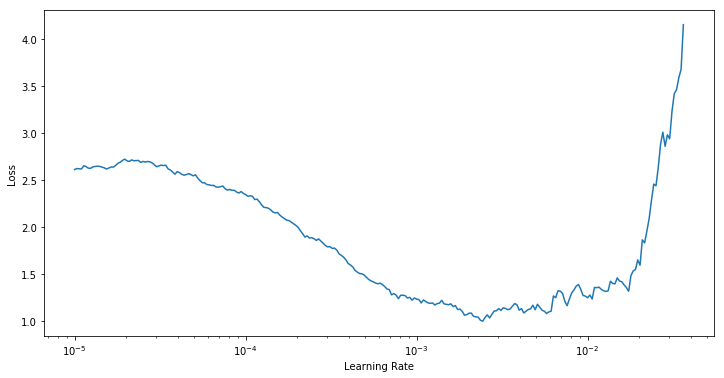

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.datasets import fashion_mnist

!git clone https://github.com/WittmannF/LRFinder
from LRFinder.keras_callback import LRFinder

# 1. Input Data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

mean, std = X_train.mean(), X_train.std()
X_train, X_test = (X_train-mean)/std, (X_test-mean)/std

# 2. Define and Compile Model
model = Sequential([Flatten(),
                    Dense(512, activation='relu'),
                    Dense(10, activation='softmax')])

model.compile(loss='sparse_categorical_crossentropy', \
              metrics=['accuracy'], optimizer='adam')


# 3. Fit using Callback
lr_finder = LRFinder(min_lr=1e-5, max_lr=1)
model.fit(X_train, y_train, callbacks=[lr_finder])

### Cyclic Learning Rate
https://github.com/bckenstler/CLR

In [ ]:
!git clone https://github.com/bckenstler/CLR

Cloning into 'CLR'...
remote: Enumerating objects: 244, done.
remote: Total 244 (delta 0), reused 0 (delta 0), pack-reused 244
Receiving objects: 100% (244/244), 1.37 MiB | 12.74 MiB/s, done.
Resolving deltas: 100% (86/86), done.


In [ ]:
from CLR.clr_callback import CyclicLR
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.datasets import mnist

# 2. Input Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255, X_test/255

# 3. Define Model
model = Sequential([Flatten(),
                    Dense(2048, activation='relu'),
                    Dense(10, activation='softmax')])

# 4. Initialize Checkpoint
clr = CyclicLR(base_lr=0.0001, max_lr=0.006,
                    step_size=2000., mode='exp_range',
                    gamma=0.99994)

# 5. Train model
model.compile(loss='sparse_categorical_crossentropy', \
              metrics=['accuracy'], optimizer='adam')

model.fit(X_train, y_train, validation_data=(X_test, y_test), \
          epochs=3, callbacks=[clr])

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 17s 279us/step - loss: 0.2701 - acc: 0.9227 - val_loss: 0.2495 - val_acc: 0.9340
Epoch 2/3
60000/60000 [==============================] - 17s 275us/step - loss: 0.1108 - acc: 0.9687 - val_loss: 0.0659 - val_acc: 0.9802
Epoch 3/3
60000/60000 [==============================] - 16s 272us/step - loss: 0.0539 - acc: 0.9850 - val_loss: 0.1552 - val_acc: 0.9588
